In [2]:
import torch 
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from VAN_new import *
import pandas as pd

In [3]:
def get_column(matrix, i):
    return torch.tensor([matrix[j][i] for j in range(len(matrix))])

In [4]:

def energie1D(spin): 
    spin_copie=spin.clone()
    spin_copie[spin_copie==0]=-1
    spin_copie_1 = torch.roll(spin_copie, -1)
    spin_copie_2 = torch.roll(spin_copie, 1)    
    energie=- torch.sum(spin_copie_1*spin_copie+spin_copie_2*spin_copie)
    return energie
    


In [5]:
def energie2D(lattice):
    energie = 0 
    for i in range(len(lattice)):
        energie+=energie1D(lattice[0])
    for j in range(len(lattice[0])):
        column = get_column(lattice, j)
        energie+=energie1D(column)
    return energie


    
energie2D(torch.tensor([[1, 1, 1], [1, 1, 1], [1, 1, 1]]))

tensor(-36)

In [6]:

def log_prob_energie(beta, energie):
    return -beta*energie


def log_prob_target_energie(spins, beta):
    
    log_probs = torch.ones(spins.shape[0]) * np.log(0.001)
    for i in range(len(log_probs)):
        racine=spins[i].shape[0]
        racine=(int(np.sqrt(racine)))
        lattice = spins[i].reshape(racine, racine)
        log_probs[i] = log_prob_energie(beta, energie2D(lattice))
    return log_probs 

In [7]:
beta_c=0.5*np.log(1+np.sqrt(2))
beta_c

0.44068679350977147

In [8]:
taille=64

In [9]:
0.5*np.log(1+np.sqrt(2))

0.44068679350977147

In [ ]:
taille=100
betas = np.linspace(0.5, 6.5, 11)
for beta in betas: 
    magnetisations_list=[]
    for i in range(15): 
        mymodel1 = VAN(taille)
        losses = train(mymodel1, lambda x:  log_prob_target_energie(x, beta), batch_size=200, n_iter=1000, lr=0.01)
        mysample=mymodel1.sample(1000)
        magnetisations=[]
        for spin in mysample:
            magnetisations.append(torch.mean(spin))
        plt.hist(magnetisations, bins=20, edgecolor='black') 
        plt.xlabel('Magnetisation du spin')
        plt.ylabel('Nombre de spins')
        plt.title('Magnetisation des spins pour beta =' + str(beta))
        plt.savefig('./figures/magnetisation for beta= '+str(beta)+' test n° ' + str(i) + '.png')
        magnetisations_list.append(magnetisations)
    pd.DataFrame(magnetisations_list).to_csv('.magnetisations/magnetisations for beta= '+str(beta)+'.csv')
        


Epoch 0: 10.571617126464844
Epoch 100: -2.803265333175659
Epoch 200: 7.708332538604736
Epoch 300: 6.469151496887207
Epoch 400: 4.389569282531738
Epoch 500: 0.4194401502609253
Epoch 600: -0.19991730153560638
Epoch 700: 0.9787042140960693
Epoch 800: 0.9211148023605347
Epoch 900: -0.05584823712706566


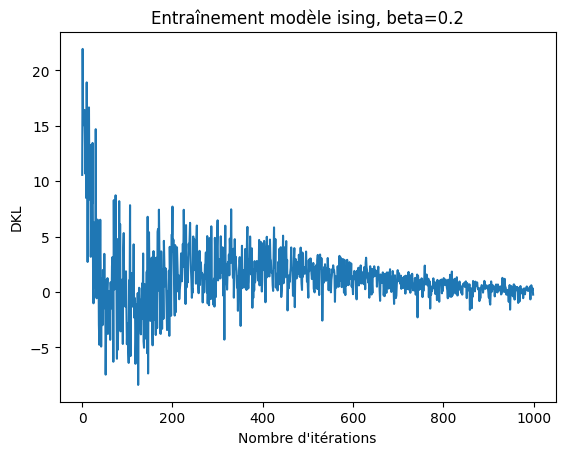

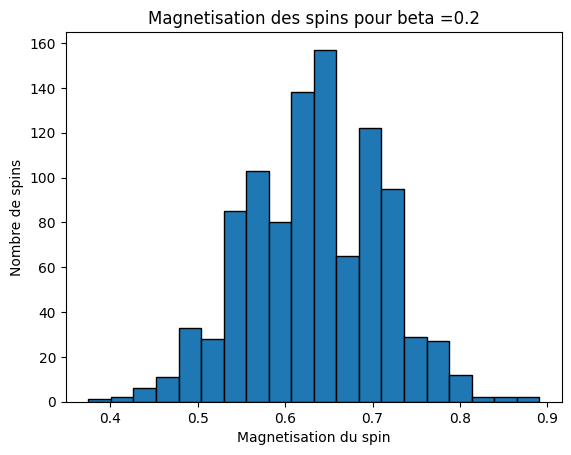

Epoch 0: 12.184844970703125


KeyboardInterrupt: 

In [20]:
for i in range(10):
    beta=0.2
    mymodel1 = VAN(taille)
    losses = train(mymodel1, lambda x:  log_prob_target_energie(x, beta), batch_size=100, n_iter=1000, lr=0.01)
    plt.plot(losses)
    plt.xlabel('Nombre d\'itérations')
    plt.ylabel('DKL')
    plt.title('Entraînement modèle ising, beta=' + str(beta))
    plt.show()

    mysample=mymodel1.sample(1000)
    magnetisations=[]
    for spin in mysample:
        magnetisations.append(torch.mean(spin))
    plt.hist(magnetisations, bins=20, edgecolor='black') 
    plt.xlabel('Magnetisation du spin')
    plt.ylabel('Nombre de spins')
    plt.title('Magnetisation des spins pour beta =' + str(beta))
    plt.savefig('./figures/magnetisation_beta_'+str(beta)+'.png')
    plt.show()

Epoch 0: 12.400630950927734
Epoch 100: 8.429817199707031
Epoch 200: -4.960844039916992
Epoch 300: -8.743309020996094
Epoch 400: -6.504662990570068
Epoch 500: -1.5838005542755127
Epoch 600: -1.8569339513778687
Epoch 700: 0.0
Epoch 800: -0.6293337941169739
Epoch 900: -0.5783702731132507


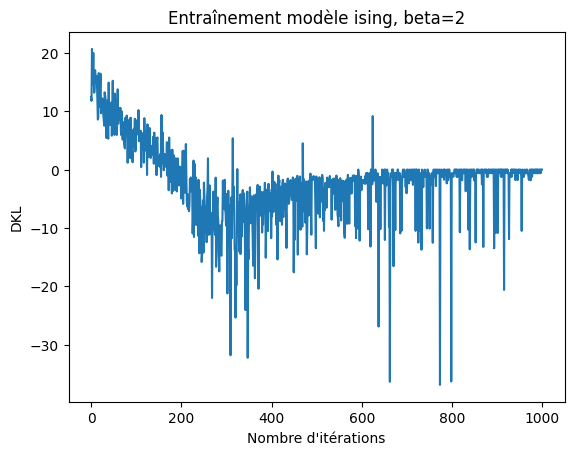

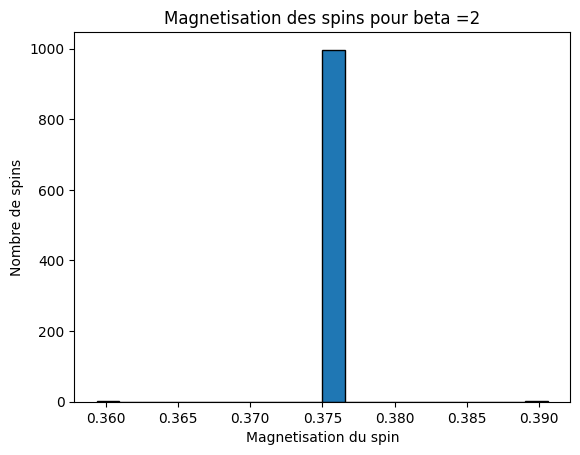

In [15]:
betaobj=2
mymodel1 = VAN(taille)
losses = train(mymodel1, lambda x:  log_prob_target_energie(x, 1), batch_size=100, n_iter=1000, lr=0.01, beta_obj=betaobj)
plt.plot(losses)
plt.xlabel('Nombre d\'itérations')
plt.ylabel('DKL')
plt.title('Entraînement modèle ising, beta=' + str(betaobj))
plt.show()

mysample=mymodel1.sample(1000)
magnetisations=[]
for spin in mysample:
    magnetisations.append(torch.mean(spin))
plt.hist(magnetisations, bins=20, edgecolor='black') 
plt.xlabel('Magnetisation du spin')
plt.ylabel('Nombre de spins')
plt.title('Magnetisation des spins pour beta =' + str(betaobj))
plt.show()
    

Epoch 0: 21.06377601623535
Epoch 100: -30.34176254272461
Epoch 200: -2.93582820892334
Epoch 300: -7.499882698059082
Epoch 400: 1.1575030088424683
Epoch 500: -1.541108250617981
Epoch 600: -1.2671107053756714
Epoch 700: 1.9567004442214966
Epoch 800: 0.2800244092941284
Epoch 900: 0.9064256548881531


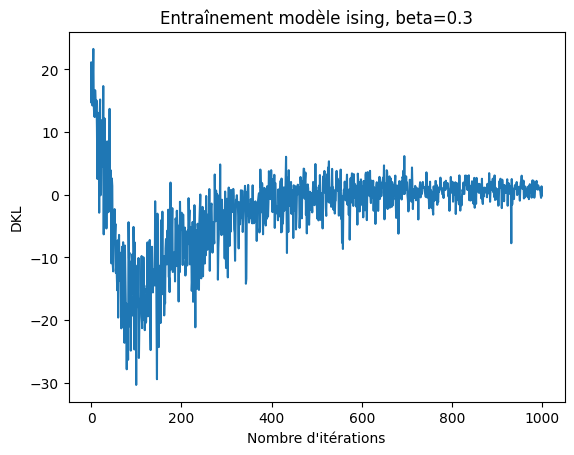

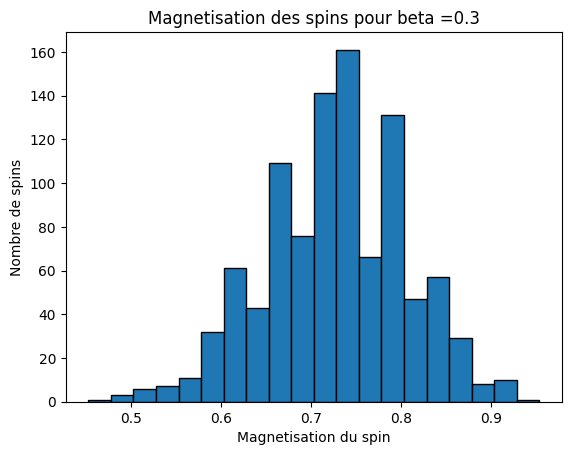

In [15]:
beta=0.3
mymodel1 = VAN(taille)
losses = train(mymodel1, lambda x:  log_prob_target_energie(x, beta), batch_size=100, n_iter=1000, lr=0.01)
plt.plot(losses)
plt.xlabel('Nombre d\'itérations')
plt.ylabel('DKL')
plt.title('Entraînement modèle ising, beta=' + str(beta))
plt.show()

mysample=mymodel1.sample(1000)
magnetisations=[]
for spin in mysample:
    magnetisations.append(torch.mean(spin))
plt.hist(magnetisations, bins=20, edgecolor='black') 
plt.xlabel('Magnetisation du spin')
plt.ylabel('Nombre de spins')
plt.title('Magnetisation des spins pour beta =' + str(beta))
plt.show()

Epoch 0: 10.600310325622559
Epoch 100: -25.115575790405273
Epoch 200: -47.10289001464844
Epoch 300: -11.380693435668945
Epoch 400: -1.9651286602020264
Epoch 500: -4.450412273406982
Epoch 600: -1.9747700691223145
Epoch 700: -2.3727550506591797
Epoch 800: -2.6434531211853027
Epoch 900: -0.907273530960083


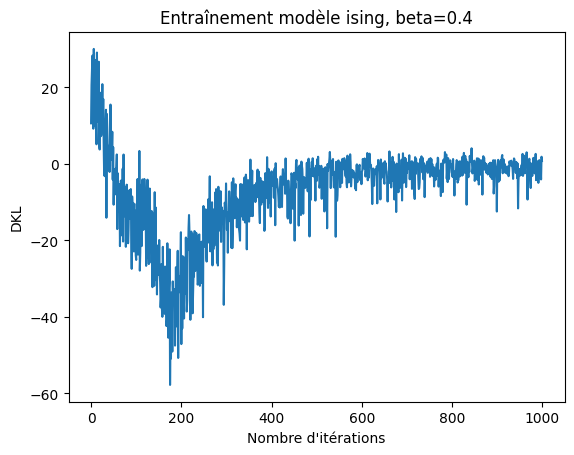

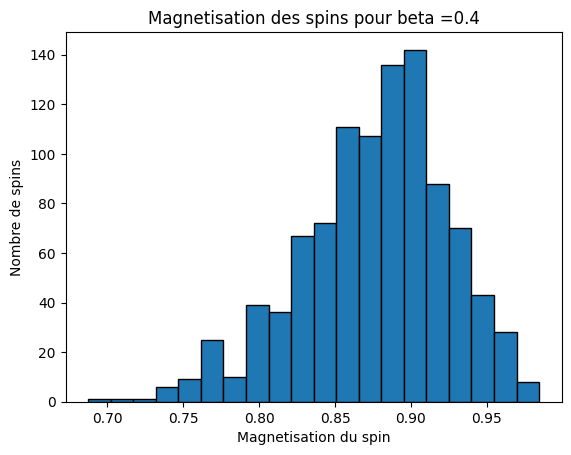

In [14]:
beta=0.4
mymodel1 = VAN(taille)
losses = train(mymodel1, lambda x:  log_prob_target_energie(x, beta), batch_size=100, n_iter=1000, lr=0.01)
plt.plot(losses)
plt.xlabel('Nombre d\'itérations')
plt.ylabel('DKL')
plt.title('Entraînement modèle ising, beta=' + str(beta))
plt.show()

mysample=mymodel1.sample(1000)
magnetisations=[]
for spin in mysample:
    magnetisations.append(torch.mean(spin))
plt.hist(magnetisations, bins=20, edgecolor='black') 
plt.xlabel('Magnetisation du spin')
plt.ylabel('Nombre de spins')
plt.title('Magnetisation des spins pour beta =' + str(beta))
plt.show()

Epoch 0: 18.462900161743164
Epoch 100: -28.151123046875
Epoch 200: -13.352495193481445
Epoch 300: -3.205822706222534
Epoch 400: 1.7885513305664062
Epoch 500: -0.6481176614761353
Epoch 600: -2.234856128692627
Epoch 700: 1.1805527210235596
Epoch 800: -0.07169481366872787
Epoch 900: -1.6305159330368042


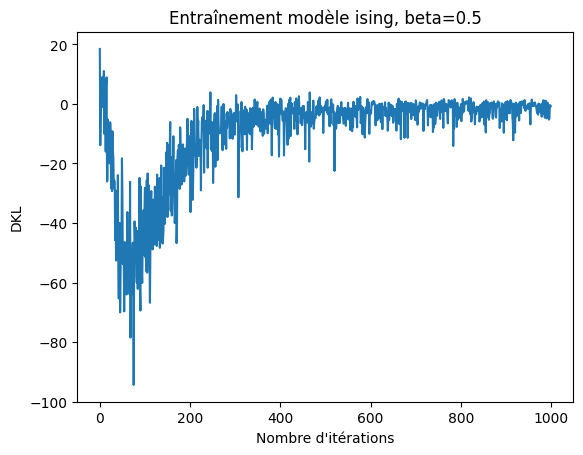

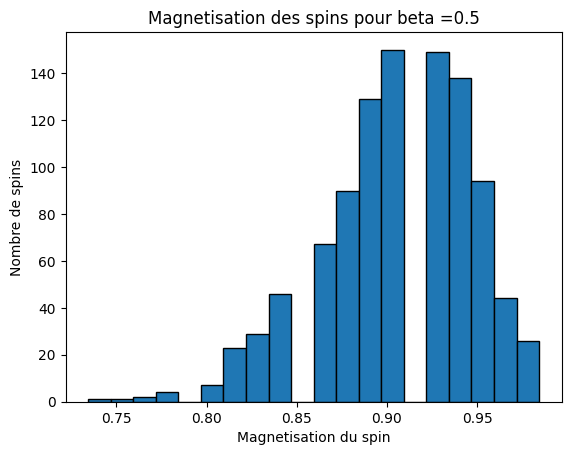

In [13]:
beta=0.5
mymodel1 = VAN(taille)
losses = train(mymodel1, lambda x:  log_prob_target_energie(x, beta), batch_size=100, n_iter=1000, lr=0.01)
plt.plot(losses)
plt.xlabel('Nombre d\'itérations')
plt.ylabel('DKL')
plt.title('Entraînement modèle ising, beta=' + str(beta))
plt.show()

mysample=mymodel1.sample(1000)
magnetisations=[]
for spin in mysample:
    magnetisations.append(torch.mean(spin))
plt.hist(magnetisations, bins=20, edgecolor='black') 
plt.xlabel('Magnetisation du spin')
plt.ylabel('Nombre de spins')
plt.title('Magnetisation des spins pour beta =' + str(beta))
plt.show()

Epoch 0: 38.939537048339844
Epoch 100: -301.1732177734375
Epoch 200: -147.7919158935547
Epoch 300: -52.29525375366211
Epoch 400: -0.5855152010917664
Epoch 500: -0.12113701552152634
Epoch 600: -0.995863676071167
Epoch 700: -0.19880123436450958
Epoch 800: -7.562692642211914
Epoch 900: 1.7515785694122314


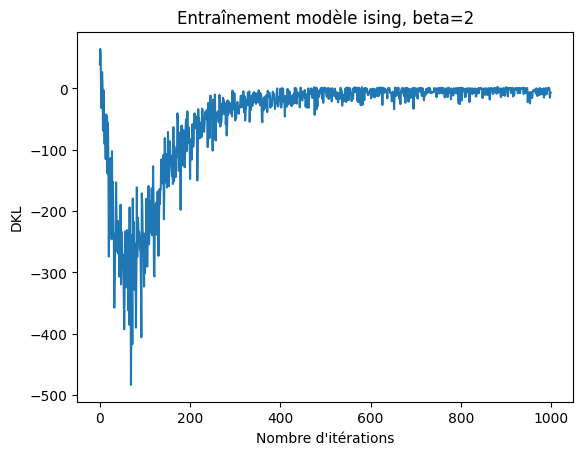

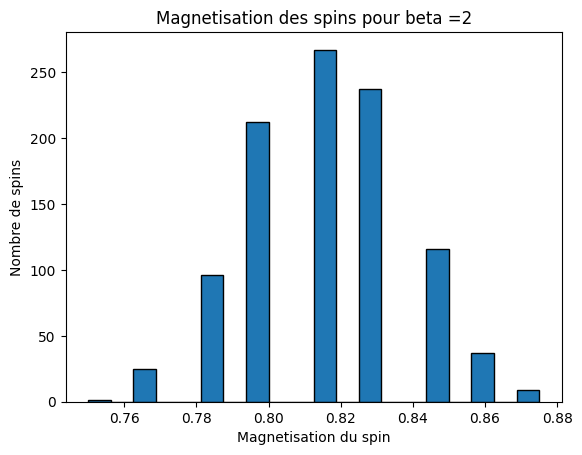

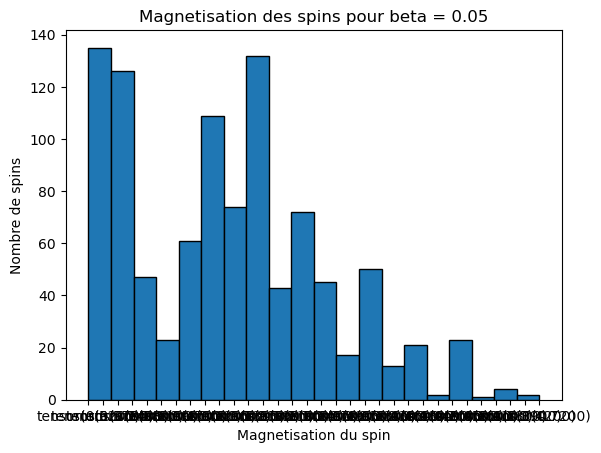

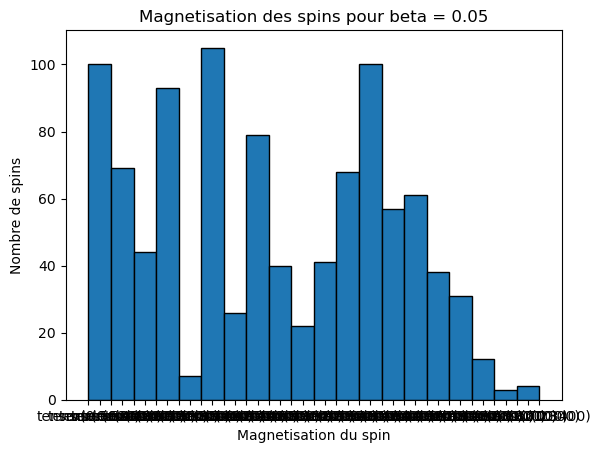

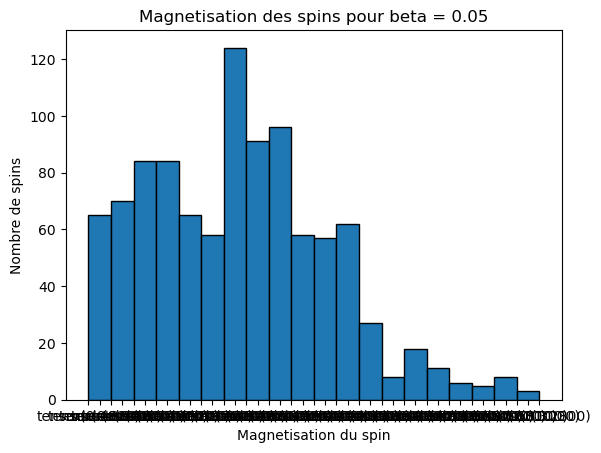

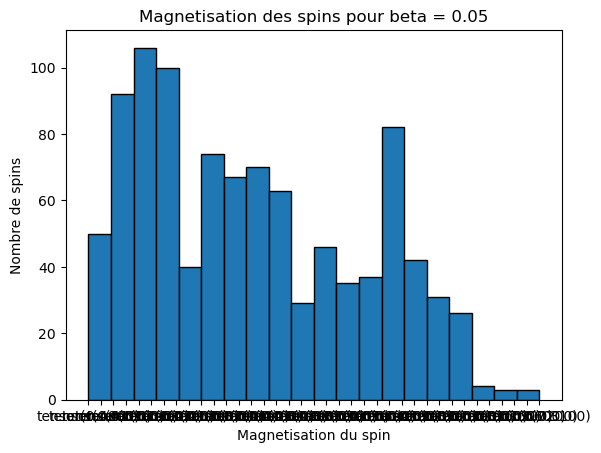

KeyboardInterrupt: 

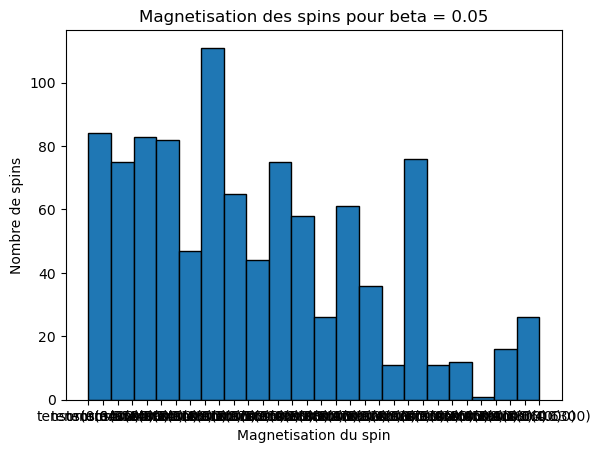

In [13]:
import pandas as pd
with open ('./magnetisations/magnetisations for beta= 0.05.csv') as f:
    data = pd.read_csv(f)
    data = data.drop(columns=['Unnamed: 0'])
    data = data.to_numpy()
    for i in range(15):
        plt.hist(data[i], bins=20, edgecolor='black') 
        plt.xlabel('Magnetisation du spin')
        plt.ylabel('Nombre de spins')
        plt.title('Magnetisation des spins pour beta = 0.05')
        plt.savefig('./figures/magnetisation for beta= 0.05 test n° ' + str(i) + '.png')
        plt.show()